# Titanic Survival Prediction 

&emsp;This popular dataset for machine learning practice is from [Kaggle](https://www.kaggle.com/competitions/titanic/overview). The objective is to create a classification model to predict the survival of the unfortunate passengers of the ship using features such as `age`, `gender`, `ticket price`, etc.

1. [Import Dataset & Libraries](#import)
2. [Exploratory Data Analysis](#eda)
3. [Models](#model)  
&emsp;3.1 [K-Nearest Neighbours](#knn)  
&emsp;3.2 [Decision Tree](#tree)  
&emsp;3.3 [Random Forest Classifier](#forest)  
&emsp;3.4 [Logistic Regression](#log)  

# Import Dataset & Libraries<a id='import'></a>

In [231]:
# Array and dataframe
import numpy as np
import pandas as pd
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams["axes.formatter.limits"] = (-99, 99)
mpl.style.use("fivethirtyeight")
import seaborn as sns
# Preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Modelling Preparation
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
import tensorflow as tf
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [232]:
# Dataset
train = pd.read_csv("https://raw.githubusercontent.com/moscmh/titanic/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/moscmh/titanic/main/test.csv")
print("train:", train.shape)
print("test:", test.shape)

train: (891, 12)
test: (418, 11)


&emsp;891 instances in the training set are given for modelling to ultimately make prediction on the 418 instances in the test set.

In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


`Pclass`: class of ticket  
`SibSp`: number of siblings and spouses onboard  
`Parch`: number of parents and children onboard  
`Ticket`: ticket number  
`Cabin`: assigned cabin  
`Embarked`: point of embarkation

# Exploratory Data Analysis<a id='eda'></a>

In [235]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


&emsp;`PassengerId` and `Name` are removed since they have all the unique values for each passenger.

In [237]:
train.drop(columns=['PassengerId', 'Name'], inplace=True)
test.drop(columns=['PassengerId', 'Name'], inplace=True)

## `Survived`

In [238]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

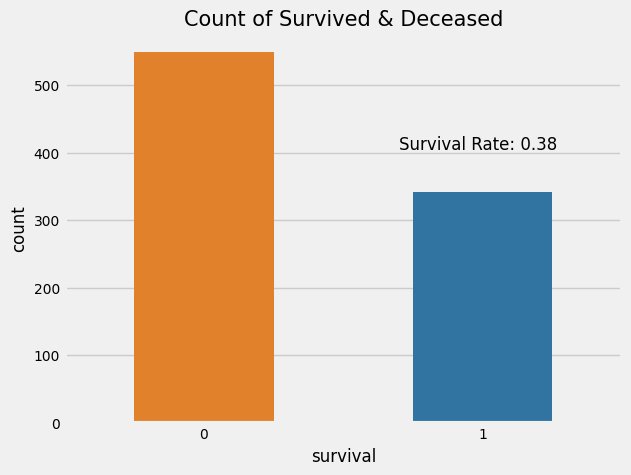

In [239]:
plot = sns.countplot(train, x='Survived', width=.5, palette=['tab:orange', 'tab:blue'])
plot.text(.7, 405, f"Survival Rate: {round(train['Survived'].value_counts()[1]/train.shape[0], 2)}", fontsize=12)
plt.title("Count of Survived & Deceased", fontsize=15)
plt.tick_params('both', labelsize=10)
plt.xlabel('survival', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

## `Pclass` (ticket class)

In [240]:
train['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

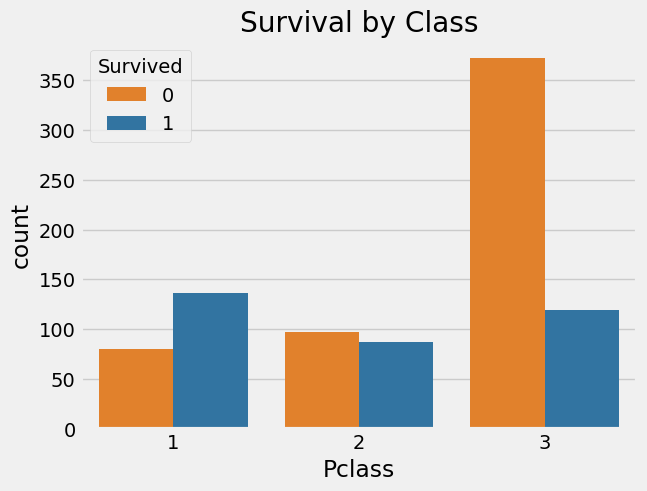

In [241]:
sns.countplot(train, x='Pclass', hue='Survived', palette=['tab:orange','tab:blue']).set(title='Survival by Class')
plt.show()

&emsp;Passengers from `Pclass` 2 seemed to have a balanced chance for survival. Other 2 `Pclass` could be useful for modelling.

## `Sex`

In [242]:
train['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

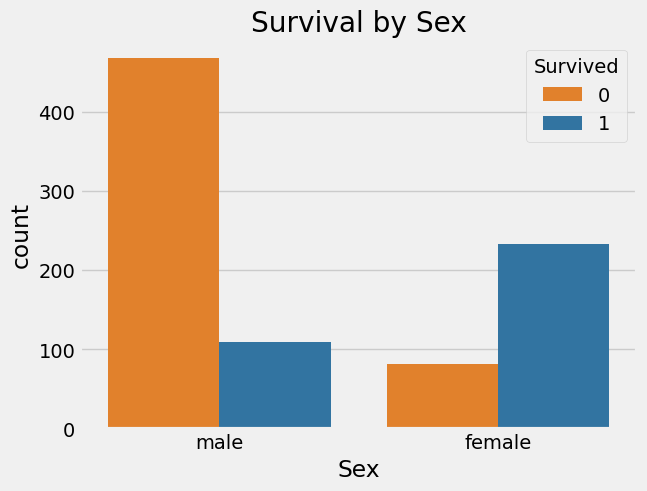

In [243]:
sns.countplot(train, x='Sex', hue='Survived', palette=['tab:orange','tab:blue']).set(title='Survival by Sex')
plt.show()

&emsp;Clearly `Sex` is a good predictor of `Survival`.

In [244]:
print(train['Sex'].value_counts())
train['Sex'] = train['Sex'].apply(lambda x: 0 if x=="female" else 1)
print(train['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Sex
1    577
0    314
Name: count, dtype: int64


In [245]:
test['Sex'] = test['Sex'].apply(lambda x: 0 if x=="female" else 1)

## `Age`

In [246]:
print(f"Number of missing values: {train['Age'].isna().sum()}")

Number of missing values: 177


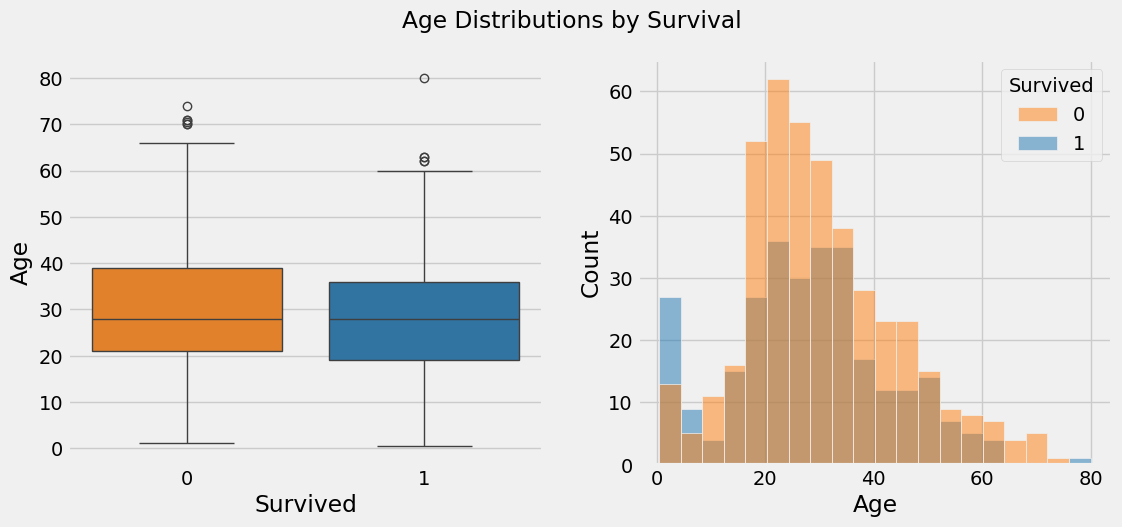

In [247]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(train, y='Age', x='Survived', palette=['tab:orange', 'tab:blue'], ax=axes[0])
sns.histplot(train, x='Age', hue='Survived', multiple='layer', palette=['tab:orange', 'tab:blue'] ,ax=axes[1])
fig.suptitle("Age Distributions by Survival")
plt.show()

&emsp;Simply from the visualizations, the passengers under 8 years old had higher chance of survival while the passengers over 64 years old had the opposite except for the eldest passenger. Apart from that, the majority of the age ranges tended to have deceased/survived ratio about 2:1.

In [248]:
print("Mean:", train['Age'].mean())
train.loc[train['Age'].isna(),"Survived"].value_counts()

Mean: 29.69911764705882


Survived
0    125
1     52
Name: count, dtype: int64

&emsp;The survival rate of passengers with missing `Age` is similar to those of `Age` of mean (~30). The missing values will be replaced by mean `Age`.

In [249]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Age'].isna().sum()

0

In [250]:
test['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].isna().sum()

0

## `SibSp` (number of siblings and spouses onboard)

In [251]:
train['SibSp'].value_counts(dropna=False).sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

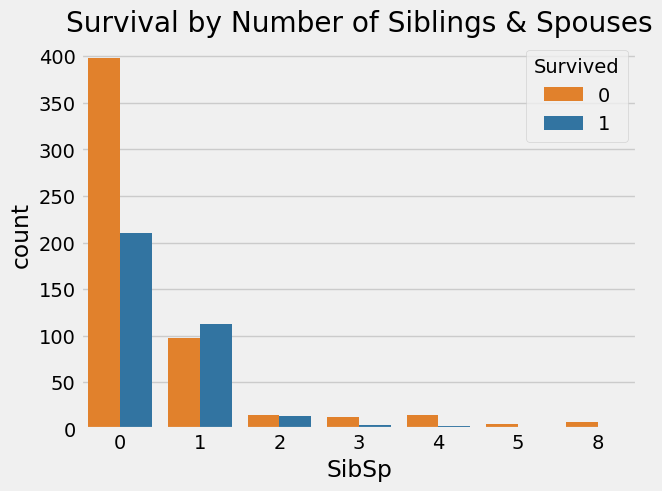

In [252]:
sns.countplot(train, x='SibSp', hue='Survived', palette=['tab:orange','tab:blue']).set(title='Survival by Number of Siblings & Spouses')
plt.show()

&emsp;The majority of the passengers had either 1 or no `siblings/spouses` onboard. For those who had none, the chance of survival was significantly lower than others.

## `Parch` (number of parents and children onboard)

In [253]:
train['Parch'].value_counts(dropna=False).sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

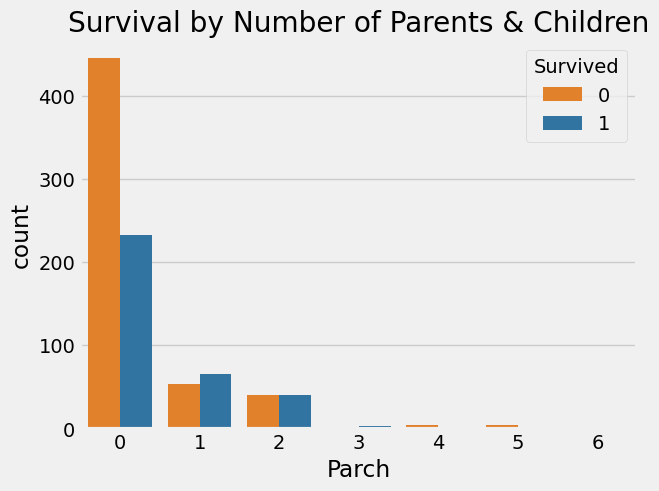

In [254]:
sns.countplot(train, x='Parch', hue='Survived', palette=['tab:orange','tab:blue']).set(title='Survival by Number of Parents & Children')
plt.show()

&emsp;The passengers with no parents & children, similar to those without siblings & spouses, tended to have significantly lower chance to survive.

## `Ticket`

In [255]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

&emsp;The format of the ticket values is irregular. Some tickets have letters while some do not. Numbers will be extracted to see if the numbers have any relationship with the binary outcome.

In [256]:
def ticket_number(ticket):
    '''
    Extra numbers from ticket.
    
    ticket (string)
    
    Return: numbers from ticket
    '''
    number = ""
    for ch in ticket:
        if ch in [str(d) for d in range(0,10)]:
            number += ch
    if len(number) == 0:
        number = "0"
    return int(number)

In [257]:
train['ticket_number'] = train['Ticket'].apply(ticket_number)
train['ticket_number'].unique()

array([  521171,    17599, 23101282,   113803,   373450,   330877,
          17463,   349909,   347742,   237736,     9549,   113783,
          52151,   347082,   350406,   248706,   382652,   244373,
         345763,     2649,   239865,   248698,   330923,   113788,
         347077,     2631,    19950,   330959,   349216,    17601,
          17569,   335677,    24579,    17604,   113789,     2677,
          52152,   345764,     2651,     7546,    11668,   349253,
           2123,   330958,   423567,   370371,    14311,     2662,
         349237,  3101295,   439886,    17572,     2926,   113509,
          19947,    31026,     2697,    34651,     2144,     2669,
         113572,    36973,   347088,    17605,     2661,    29395,
           3464,  3101281,   315151,    33111,    14879,     2680,
           1601,   348123,   349208,   374746,   248738,   364516,
         345767,   345779,   330932,   113059,    14885,  3101278,
           6608,   392086,   343275,   343276,   347466,     5

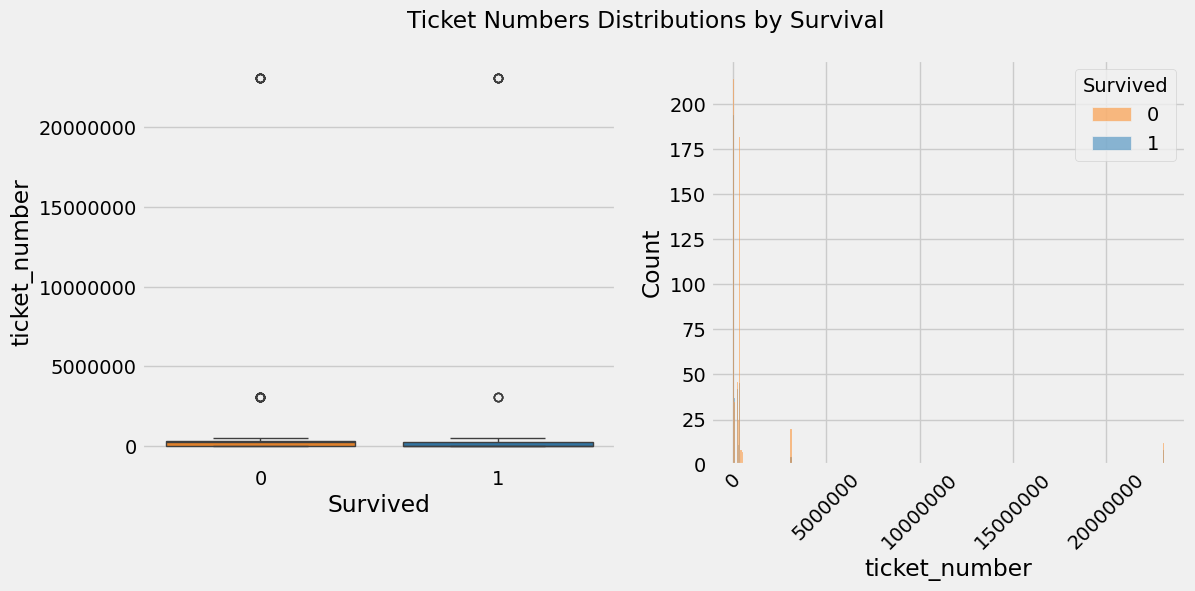

In [258]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(train, y='ticket_number', x='Survived', palette=['tab:orange', 'tab:blue'], ax=axes[0])
sns.histplot(train, x='ticket_number', hue='Survived', multiple='layer', palette=['tab:orange', 'tab:blue'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
fig.suptitle("Ticket Numbers Distributions by Survival")
plt.show()

&emsp;The visualizations are obscure because of the extreme outliers.

In [259]:
tn_25 = train['ticket_number'].quantile(.25)
tn_75 = train['ticket_number'].quantile(.75)
tn_iqr = tn_75 - tn_25
tn_lr = tn_25 - tn_iqr*1.5
tn_ur = tn_75 + tn_iqr*1.5

train['ticket_number'].where(train['ticket_number'] > tn_lr, tn_lr, inplace=True)
train['ticket_number'].where(train['ticket_number'] < tn_ur, tn_ur, inplace=True)

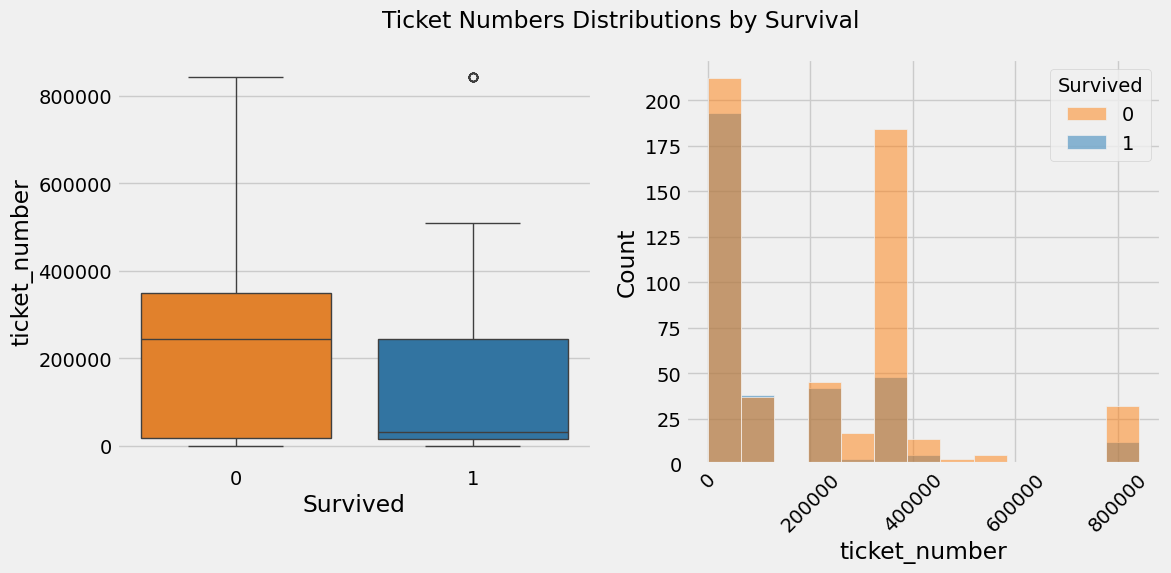

In [260]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(train, y='ticket_number', x='Survived', palette=['tab:orange', 'tab:blue'], ax=axes[0])
sns.histplot(train, x='ticket_number', hue='Survived', multiple='layer', palette=['tab:orange', 'tab:blue'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
fig.suptitle("Ticket Numbers Distributions by Survival")
plt.show()

&emsp;The `survival rate` for passengers with ticket numbers smaller or around 200000 seems better than the rest of the passengers.

In [261]:
test['ticket_number'] = test['Ticket'].apply(ticket_number)
test['ticket_number'].where(test['ticket_number'] > tn_lr, tn_lr, inplace=True)
test['ticket_number'].where(test['ticket_number'] < tn_ur, tn_ur, inplace=True)

## `Fare`

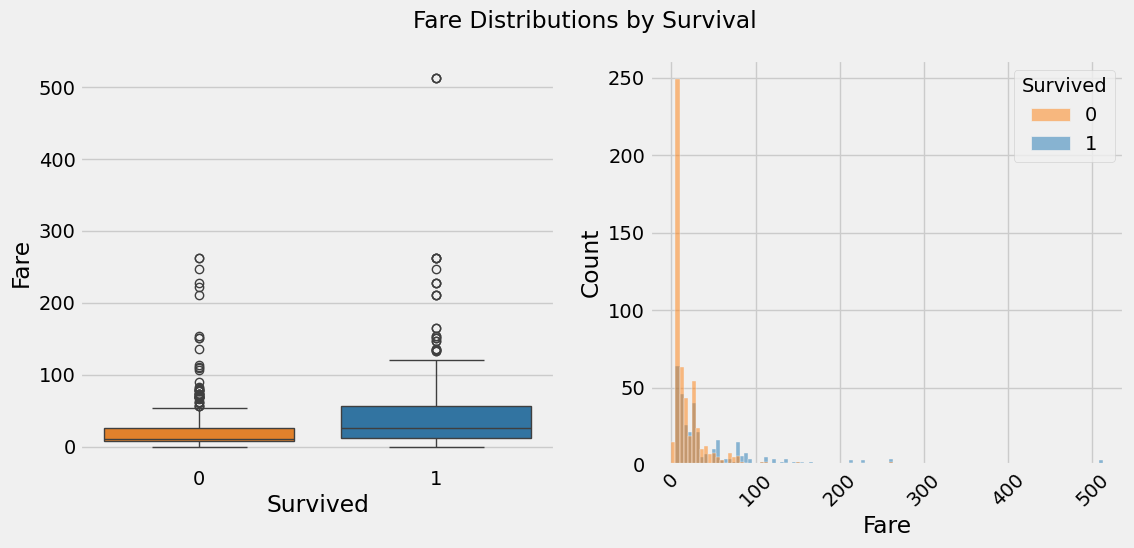

In [262]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(train, y='Fare', x='Survived', palette=['tab:orange', 'tab:blue'], ax=axes[0])
sns.histplot(train, x='Fare', hue='Survived', multiple='layer', palette=['tab:orange', 'tab:blue'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
fig.suptitle("Fare Distributions by Survival")
plt.show()

&emsp;The visualizations suggest those passengers with tickets of higher fare had better chance to survive.

In [263]:
train['Fare'].sort_values(ascending=False)[:10]

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [264]:
train.loc[train['Fare']==train['Fare'].max(), 'Fare'] = 263

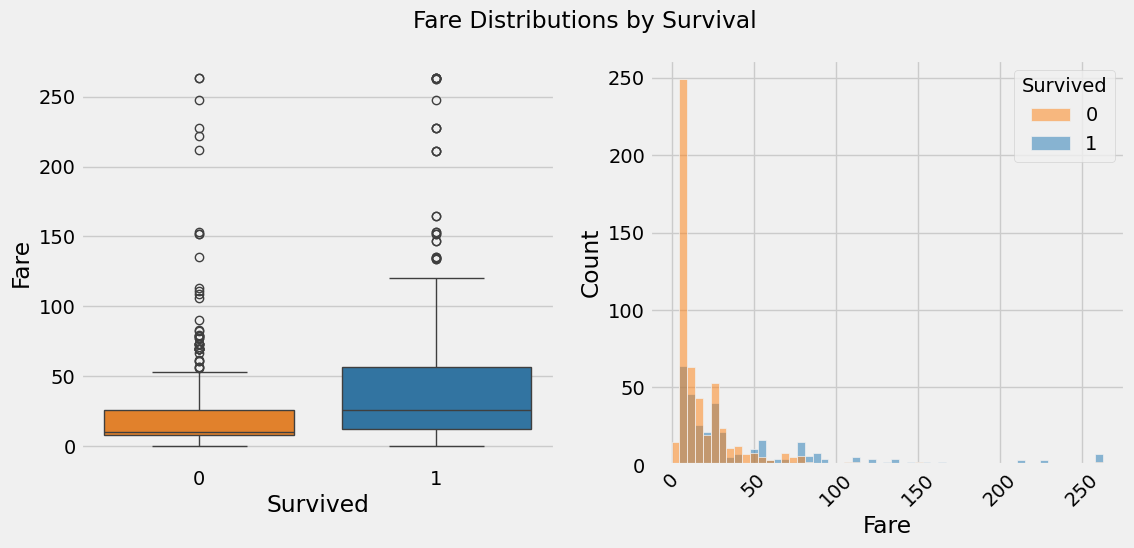

In [265]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(train, y='Fare', x='Survived', palette=['tab:orange', 'tab:blue'], ax=axes[0])
sns.histplot(train, x='Fare', hue='Survived', multiple='layer', palette=['tab:orange', 'tab:blue'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
fig.suptitle("Fare Distributions by Survival")
plt.show()

&emsp;Replacing the extreme fares by the second highest fare made the distribution less skewed. Further transformation may be needed.

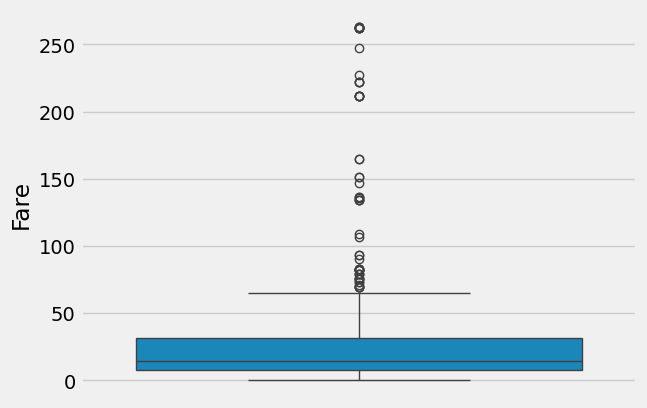

In [266]:
test.loc[test['Fare']==512.3292, 'Fare'] = 263
sns.boxplot(test, y='Fare')
plt.show()

## `Cabin`

In [267]:
train['Cabin'].value_counts(dropna=False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [268]:
print("Passengers WITHOUT Cabin data")
print()
print(train.loc[train['Cabin'].isna(),'Survived'].value_counts().sort_index())
print()
print("Passengers WITH Cabin data")
print()
print(train.loc[~train['Cabin'].isna(),'Survived'].value_counts().sort_index())

Passengers WITHOUT Cabin data

Survived
0    481
1    206
Name: count, dtype: int64

Passengers WITH Cabin data

Survived
0     68
1    136
Name: count, dtype: int64


&emsp;Due to unknown reasons, passengers with `Cabin` data had obviously more chance to survive than those without. Adding an extra feature addressing this.

In [269]:
train['cabin_data'] = train['Cabin'].isna()
train['cabin_data'] = train['cabin_data'].apply(lambda x: 0 if x==True else 1)

test['cabin_data'] = test['Cabin'].isna()
test['cabin_data'] = test['cabin_data'].apply(lambda x: 0 if x==True else 1)

In [270]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [271]:
train.loc[~train['Cabin'].isna(), 'cabin_letter'] = train['Cabin'].apply(lambda x: str(x)[0])
train.loc[train['Cabin'].isna(), 'cabin_letter'] = "0"
train['cabin_letter'].unique()

array(['0', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [272]:
test.loc[~test['Cabin'].isna(), 'cabin_letter'] = test['Cabin'].apply(lambda x: str(x)[0])
test.loc[test['Cabin'].isna(), 'cabin_letter'] = "0"

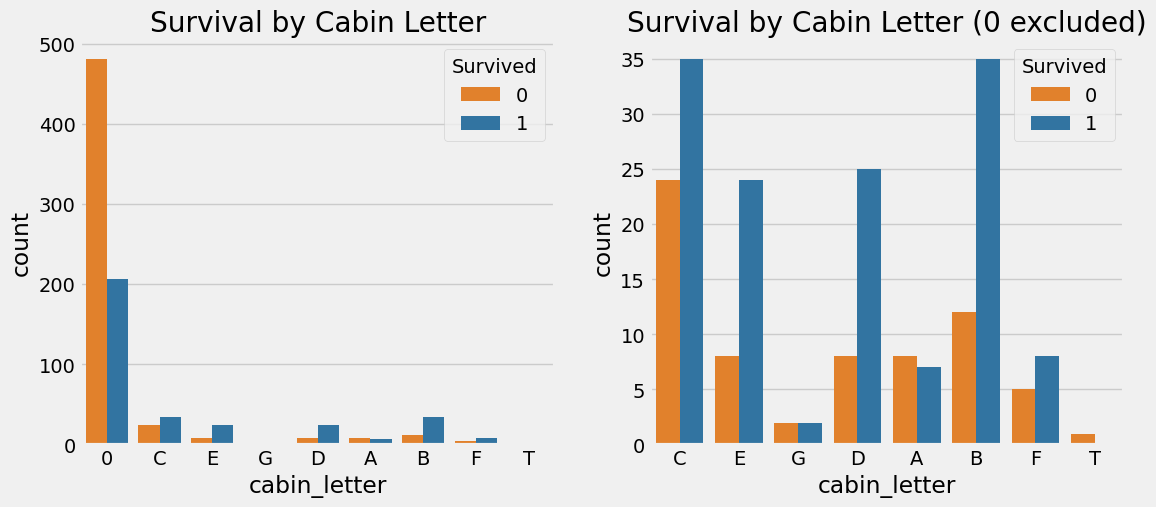

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(train, x='cabin_letter', hue='Survived', palette=['tab:orange','tab:blue'], ax=axes[0]).set(title='Survival by Cabin Letter')
sns.countplot(train.loc[train['cabin_letter']!='0',:], x='cabin_letter', hue='Survived', palette=['tab:orange','tab:blue'], ax=axes[1]).set(title='Survival by Cabin Letter (0 excluded)')
plt.show()

&emsp;The `survival rate` for passengers with different `Cabin` beginning letters appeared to vary.

In [274]:
train = pd.get_dummies(train, columns=['cabin_letter'], drop_first=False, dtype=int)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,cabin_data,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,...,1,0,0,0,1,0,0,0,0,0


In [275]:
test = pd.get_dummies(test, columns=['cabin_letter'], drop_first=False, dtype=int)
test['cabin_letter_T'] = 0

## `Embarked`

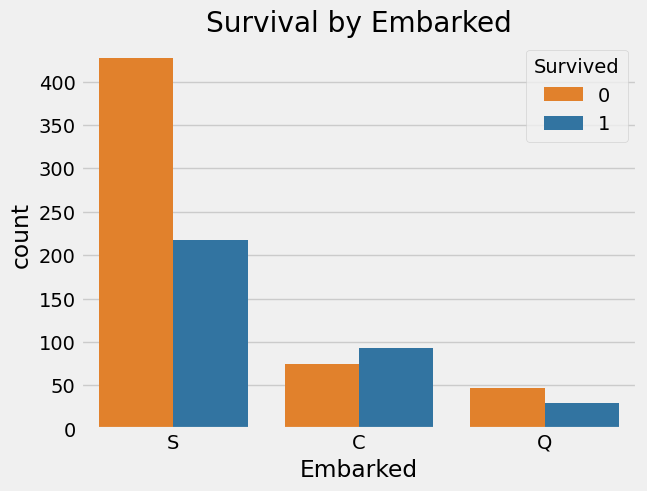

In [276]:
sns.countplot(train, x='Embarked', hue='Survived', palette=['tab:orange','tab:blue']).set(title='Survival by Embarked')
plt.show()

In [277]:
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [278]:
train.loc[train['Embarked'].isna(), :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,cabin_data,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T
61,1,1,0,38.0,0,0,113572,80.0,B28,NaN,...,1,0,0,1,0,0,0,0,0,0
829,1,1,0,62.0,0,0,113572,80.0,B28,NaN,...,1,0,0,1,0,0,0,0,0,0


&emsp;The two passengers with missing `Embarked` values have almost the same information except for `Age`. Imputation using K-nearest neighbours is used to replace missing values.

In [279]:
embarked_na_index = train.loc[train['Embarked'].isna(), :].index
train = pd.get_dummies(train, columns=['Embarked'], drop_first=False, dtype=int)
train.loc[embarked_na_index, ['Embarked_S', 'Embarked_C', 'Embarked_Q']] = np.nan

In [280]:
test = pd.get_dummies(test, columns=['Embarked'], drop_first=False, dtype=int)
test.drop(columns=['Cabin','Ticket','cabin_data'], inplace=True)

In [281]:
train.drop(columns=['Cabin','Ticket','cabin_data'], inplace=True)
knn = KNNImputer(n_neighbors=3)
train_features = pd.DataFrame(knn.fit_transform(train.drop(columns=['Survived'])), columns=train.columns[1:])
train = pd.concat([train['Survived'], train_features], axis=1)

In [282]:
train.loc[[61,829],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,ticket_number,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,Embarked_S
61,1,1.0,0.0,38.0,0.0,0.0,80.0,113572.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667
829,1,1.0,0.0,62.0,0.0,0.0,80.0,113572.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667


&emsp;The imputed values on `Embarked_`s are not either 1 and 0. Both of them will have 1 for `Embarked_S` and 0 for other two dummy variables.

In [283]:
train.loc[[61,829], ['Embarked_C']] = 0
train.loc[[61,829], ['Embarked_S']] = 1
train.loc[[61,829],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,ticket_number,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,Embarked_S
61,1,1.0,0.0,38.0,0.0,0.0,80.0,113572.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
829,1,1.0,0.0,62.0,0.0,0.0,80.0,113572.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    float64
 2   Sex             891 non-null    float64
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    float64
 5   Parch           891 non-null    float64
 6   Fare            891 non-null    float64
 7   ticket_number   891 non-null    float64
 8   cabin_letter_0  891 non-null    float64
 9   cabin_letter_A  891 non-null    float64
 10  cabin_letter_B  891 non-null    float64
 11  cabin_letter_C  891 non-null    float64
 12  cabin_letter_D  891 non-null    float64
 13  cabin_letter_E  891 non-null    float64
 14  cabin_letter_F  891 non-null    float64
 15  cabin_letter_G  891 non-null    float64
 16  cabin_letter_T  891 non-null    float64
 17  Embarked_C      891 non-null    flo

In [285]:
test = test.astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    float64
 1   Sex             418 non-null    float64
 2   Age             418 non-null    float64
 3   SibSp           418 non-null    float64
 4   Parch           418 non-null    float64
 5   Fare            417 non-null    float64
 6   ticket_number   418 non-null    float64
 7   cabin_letter_0  418 non-null    float64
 8   cabin_letter_A  418 non-null    float64
 9   cabin_letter_B  418 non-null    float64
 10  cabin_letter_C  418 non-null    float64
 11  cabin_letter_D  418 non-null    float64
 12  cabin_letter_E  418 non-null    float64
 13  cabin_letter_F  418 non-null    float64
 14  cabin_letter_G  418 non-null    float64
 15  cabin_letter_T  418 non-null    float64
 16  Embarked_C      418 non-null    float64
 17  Embarked_Q      418 non-null    flo

In [286]:
na_index = test.loc[test['Fare'].isna(),:].index
test = pd.DataFrame(knn.transform(test), columns=test.columns)
# test.loc[na_index,:]
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,ticket_number,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,Embarked_S
0,3.0,1.0,34.5,0.0,0.0,7.8292,330911.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,363272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,240276.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,315154.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,842531.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [287]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,ticket_number,cabin_letter_0,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3.0,1.0,22.0,1.0,0.0,7.2500,521171.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,0.0,38.0,1.0,0.0,71.2833,17599.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3.0,0.0,26.0,0.0,0.0,7.9250,842531.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1.0,0.0,35.0,1.0,0.0,53.1000,113803.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3.0,1.0,35.0,0.0,0.0,8.0500,373450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


&emsp;Many of the features have binary values. The following classification algorithms are considered.  
* K-Nearest Neighbours  
* Decision Tree  
* Random Forest Classifier  
* Naive-Bayes  
* Logistic Regression  
* (Deep Learning)

&emsp;Since many of the algorithms above require either normalization or standardization, it will be done before model training.

# Models<a id="model"></a>

In [288]:
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=.3, random_state=44)
X_test = test
print("Training set:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print(y_train.value_counts())
print()
print("Validation set:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print(y_val.value_counts())
print()
print("X_test:")
print(X_test.shape)

Training set:
X_train: (623, 19)
y_train: (623,)
Survived
0    385
1    238
Name: count, dtype: int64

Validation set:
X_val: (268, 19)
y_val: (268,)
Survived
0    164
1    104
Name: count, dtype: int64

X_test:
(418, 19)


## K-Nearest Neighbours<a id='knn'></a>

In [289]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [290]:
clf = KNeighborsClassifier(n_jobs=-1)
params = {
    "n_neighbors":[3,5,7,9,11,13,15,17,21,23,25],
    "weights":['uniform', 'distance'],
    "p":[1,2]
}

gscv = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

In [291]:
gscv.fit(X_train_scaled, y_train)
best_model = gscv.best_estimator_
print(gscv.best_score_)
print(gscv.best_params_)

KeyboardInterrupt: 

In [ ]:
best_model.score(X_val_scaled, y_val)

0.7761194029850746

In [ ]:
y_pred = best_model.predict(X_test_scaled)
id = [i for i in range(892,892+418)]
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
with open("knn.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

&emsp;The saturated model's accuracy on the test set is .76555. Next, individual feature's performance will be compared and regularization will be done to see if the over-fitting problem would be resolved.

In [ ]:
accuracies = {}
for col in X_train_scaled.columns:
    gscv.fit(X_train_scaled[[col]], y_train)
    accuracies[col] = round(gscv.best_score_,2)

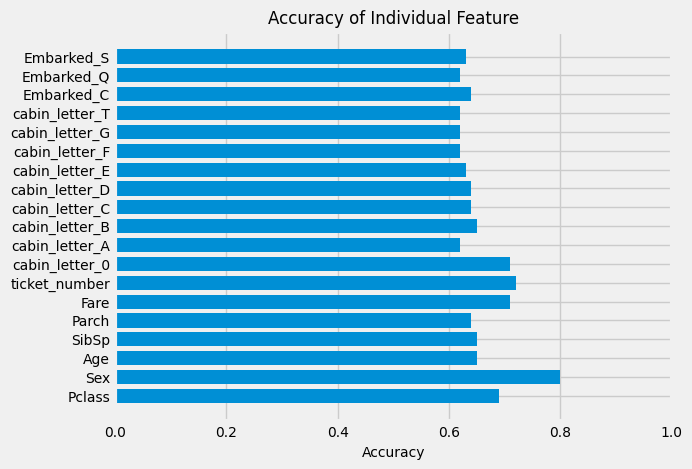

In [ ]:
plt.barh(accuracies.keys(), accuracies.values(), height=.75)
plt.tick_params('both', labelsize=10)
plt.xlabel("Accuracy", fontsize=10)
plt.xlim(0,1)
plt.title("Accuracy of Individual Feature", fontsize=12)
plt.show()

&emsp;The accuracies of most features are about .60. `Sex` has the best accuracy close to .8 whereas `Embarked_Q` and `cabin_letter_E` have only about .42 accuracies.  

&emsp;In the following, $(n - 1)$ features will be trained first, followed by removing one feature with the lowest accuracy at a time. Accuracies will be recorded.

In [ ]:
features_ranked = sorted(accuracies, key=accuracies.get, reverse=True) # Rank features by accuracy (index 0 has the top accuracy)

acc_models = {}
for i in range(len(features_ranked)-1, 0, -1):
    gscv.fit(X_train_scaled.loc[:,features_ranked[:i]], y_train)
    acc_models[i] = round(gscv.best_score_,4)

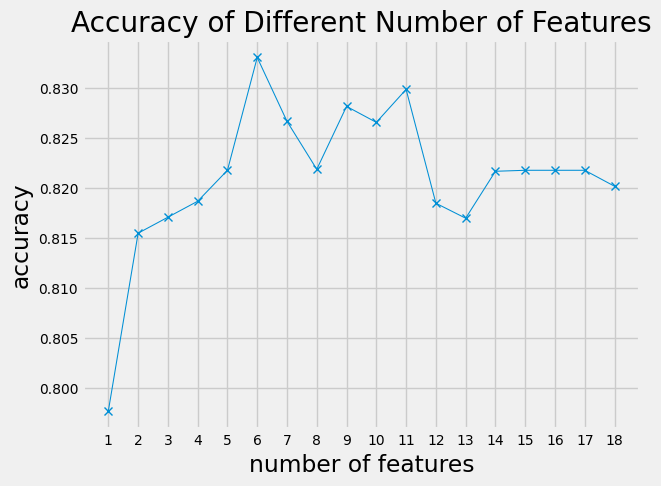

In [ ]:
plt.plot(acc_models.keys(), acc_models.values(), marker='x', lw=.75)
plt.tick_params('both', labelsize=10)
plt.xticks(range(min(acc_models.keys()),max(acc_models.keys())+1))
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("Accuracy of Different Number of Features")
plt.show()

In [ ]:
features_ranked[:6]

['Sex', 'ticket_number', 'Fare', 'cabin_letter_0', 'Pclass', 'Age']

&emsp;The result shows that the best model (in this approach) take only 3 features which are `Sex`, `Fare`, and `Pclass`. They will be used to train a model again and perform prediction on the test set.

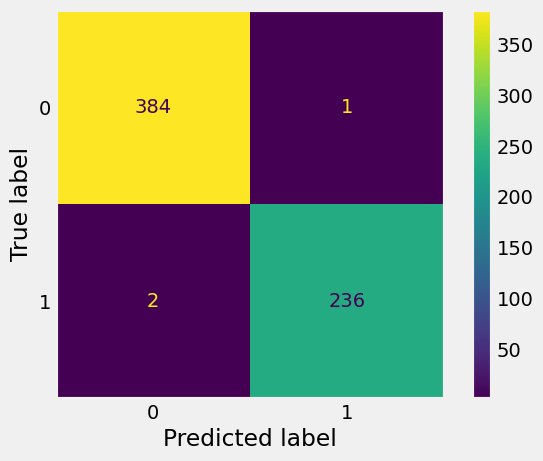

In [ ]:
gscv.fit(X_train_scaled[features_ranked[:6]], y_train)
conf = confusion_matrix(y_train, gscv.best_estimator_.predict(X_train_scaled[features_ranked[:6]]))
ConfusionMatrixDisplay(conf).plot()
plt.grid(False)
plt.show()

In [ ]:
print(gscv.best_params_)
print(gscv.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print(gscv.best_estimator_.score(X_train_scaled[features_ranked[:6]], y_train))
print(np.mean(cross_val_score(gscv.best_estimator_, X_train_scaled[features_ranked[:6]], y_train, scoring='accuracy', cv=5, n_jobs=-1)))
print()
print(gscv.best_estimator_.score(X_val_scaled[features_ranked[:6]], y_val))


0.9951845906902087
0.8330967741935484

0.7649253731343284


&emsp;Since the best estimators has hyperparameter `n_neighbors` equals to the right end of the grid search, a new grid search is carried out again with a larger range.

In [ ]:
# # Grid search object
# clf = KNeighborsClassifier(n_jobs=-1)
# params = {
#     "n_neighbors":[25,27,29,31,33,35],
#     "weights":['uniform', 'distance']
# }

# gscv = GridSearchCV(clf, params, cv=10, scoring='accuracy', n_jobs=-1)

# # Individual feature's accuracy
# accuracies = {}
# for col in X_train.columns:
#     gscv.fit(X_train[[col]], y_train)
#     accuracies[col] = round(gscv.best_score_,2)

# # Rank features by accuracy (index 0 has the top accuracy)
# features_ranked = sorted(accuracies, key=accuracies.get, reverse=True)

# # Accuracies of models with different number of features
# acc_models = {}
# for i in range(len(features_ranked)-1, 0, -1):
#     gscv.fit(X_train.loc[:,features_ranked[:i]], y_train)
#     acc_models[i] = round(gscv.best_score_,4)

# plt.plot(acc_models.keys(), acc_models.values(), marker='x', lw=.75)
# plt.tick_params('both', labelsize=10)
# plt.xticks(range(min(acc_models.keys()),max(acc_models.keys())+1))
# plt.xlabel("number of features")
# plt.ylabel("accuracy")
# plt.title("Accuracy of Different Number of Features")
# plt.show()

In [ ]:
# # Re-fit grid search object with the 2 best features
# gscv.fit(X_train[features_ranked[:2]], y_train)
# # Evaluate performance on training
# conf = confusion_matrix(y_train, gscv.best_estimator_.predict(X_train[features_ranked[:2]]))
# ConfusionMatrixDisplay(conf).plot()
# plt.grid(False)
# plt.show()

# print(gscv.best_params_)
# print(gscv.best_score_)

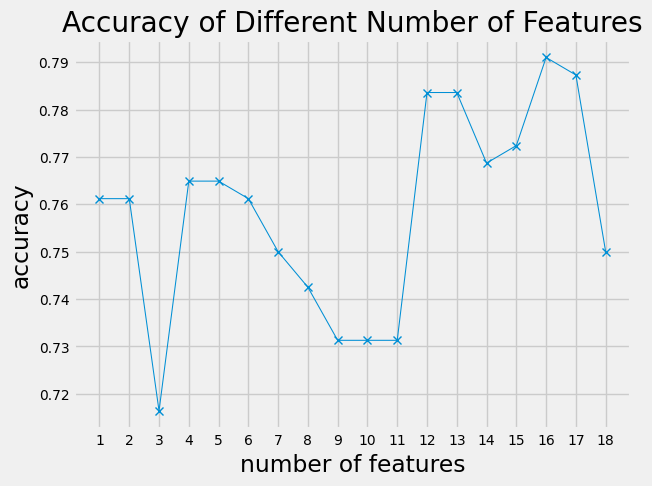

In [ ]:
# Individual feature's accuracy
accuracies = {}
for col in X_train_scaled.columns:
    gscv.fit(X_train_scaled[[col]], y_train)
    accuracies[col] = round(gscv.best_estimator_.score(X_val_scaled[[col]], y_val),2)

# Rank features by accuracy (index 0 has the top accuracy)
features_ranked = sorted(accuracies, key=accuracies.get, reverse=True)

# Accuracies of models with different number of features
acc_models = {}
for i in range(len(features_ranked)-1, 0, -1):
    gscv.fit(X_train_scaled[features_ranked[:i]], y_train)
    acc_models[i] = round(gscv.best_estimator_.score(X_val_scaled[features_ranked[:i]], y_val),4)

plt.plot(acc_models.keys(), acc_models.values(), marker='x', lw=.75)
plt.tick_params('both', labelsize=10)
plt.xticks(range(min(acc_models.keys()),max(acc_models.keys())+1))
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("Accuracy of Different Number of Features")
plt.show()

In [ ]:
# Perform prediction on test set
gscv.fit(X_train_scaled[['Sex','Fare','ticket_number','cabin_letter_0']], y_train)
y_pred = gscv.best_estimator_.predict(X_test_scaled[['Sex','Fare','ticket_number','cabin_letter_0']])
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("knn.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

In [ ]:
print(gscv.best_score_)
print(gscv.best_params_)
print(gscv.best_estimator_.score(X_val_scaled[['Sex','Fare','ticket_number','cabin_letter_0']], y_val))

0.8186580645161291
{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
0.7350746268656716


### 20240725
&emsp;Although the test accuracy is .73923, it reflected that the result of validation set (.7388) is accurate and reflective. Thus, accuracies on validation set with models using different number of features will be compared to find the best model for test set prediction.

&emsp;The accuracy on test set has been increased to 0.79665. While the accuracy on the training set is 0.81820, overfitting may still be a problem of the model. Besides, the `precision` is better than `recall` which means the model makes more mistakes on passengers who were deceased in the event.

## Decision Tree<a id="tree"></a>

In [ ]:
clf = DecisionTreeClassifier(random_state=4)
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [d for d in range(3,9)],
    "min_samples_leaf": [l for l in range(1,20,2)],
    "class_weight": [None, "balanced"]
}

gscv = GridSearchCV(clf, params, cv=10, scoring='accuracy', n_jobs=-1)
gscv.fit(train.drop(columns=['Survived']), train['Survived'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19]},
             scoring='accuracy')

In [ ]:
print(gscv.best_score_)
print(gscv.best_params_)

0.8237952559300874
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 11}


&emsp;The hyperparameters `max_depth` and `min_samples_leaf` are also in somewhere near the middle of the ranges searched.

In [ ]:
best_tree = gscv.best_estimator_
best_tree.fit(train.drop(columns=['Survived']), train['Survived'])
print(best_tree.score(train.drop(columns=['Survived']), train['Survived']))

0.8709315375982043


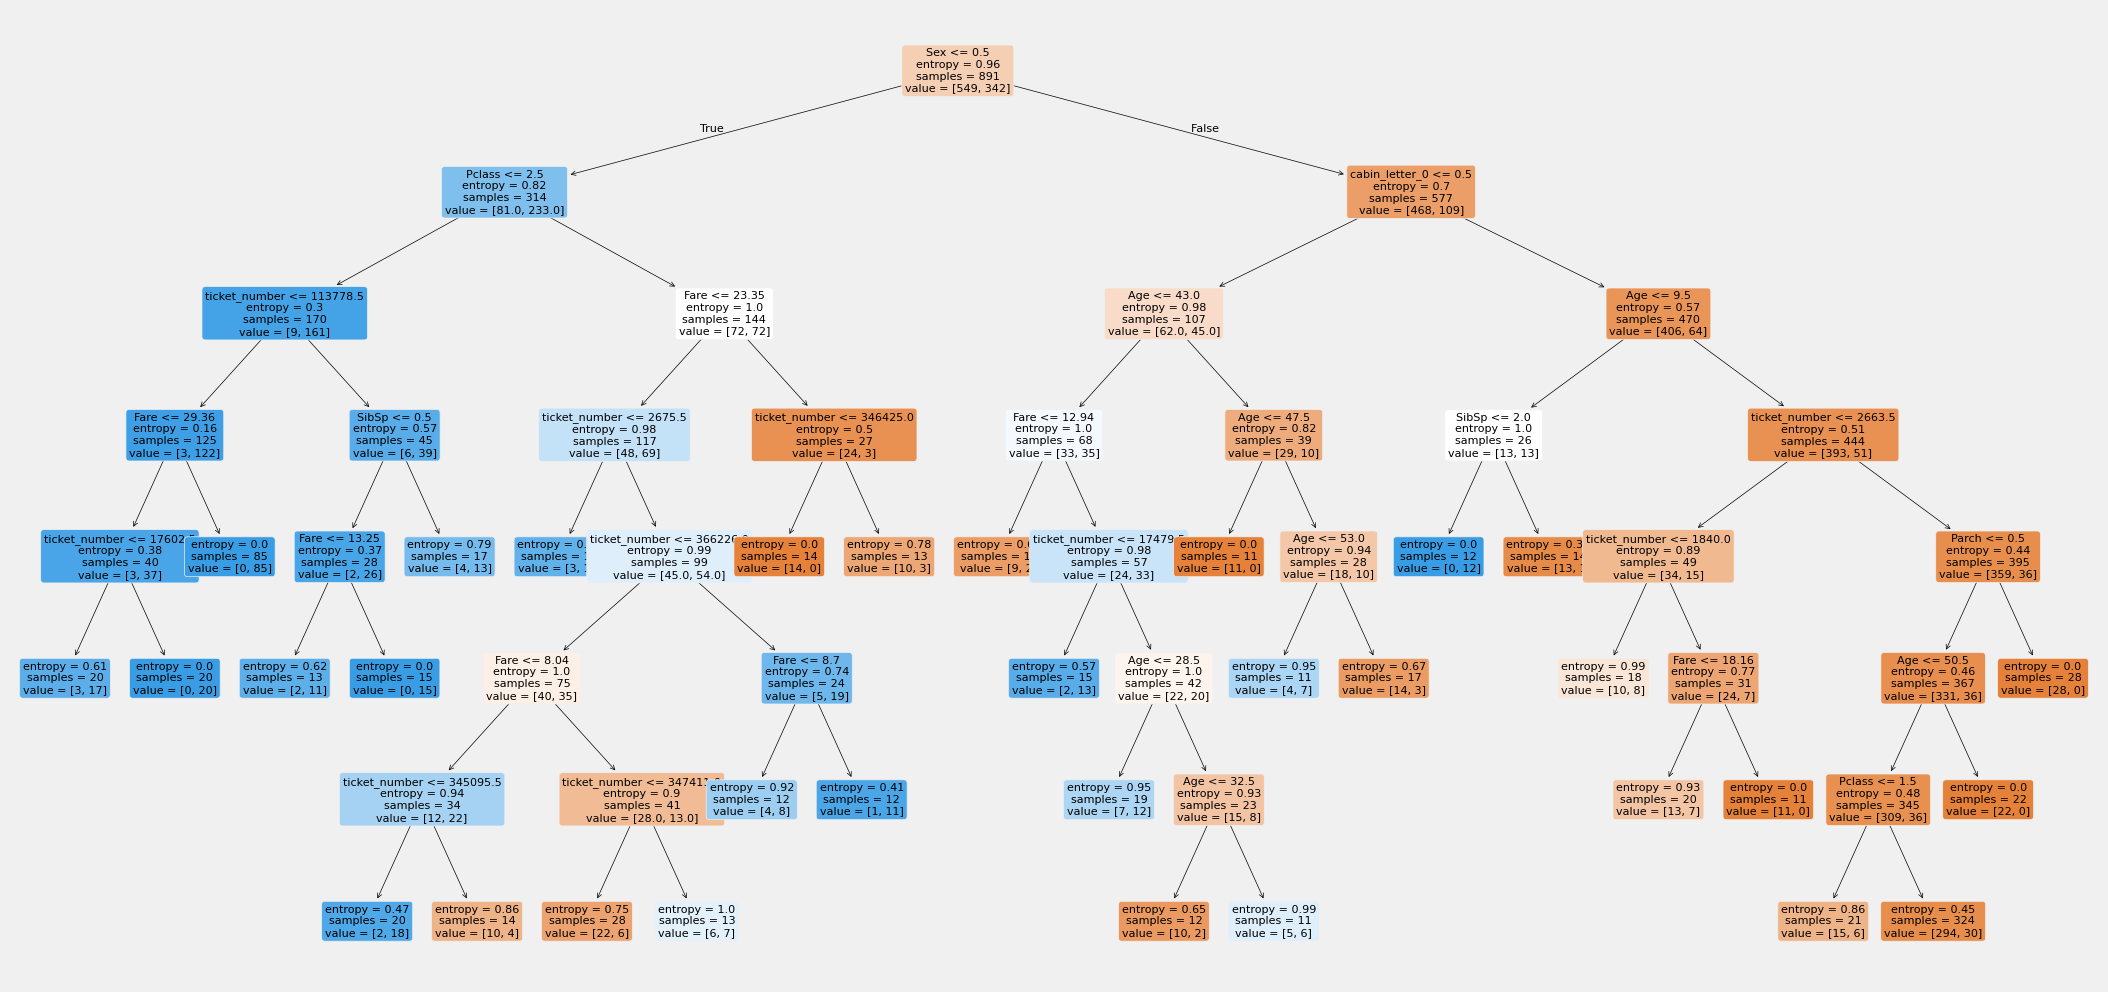

In [ ]:
plt.figure(figsize=(24,12))
_ = plot_tree(best_tree,
feature_names = X_train.columns,
# class_names = best_tree.classes_,
filled = True,
proportion = False,
precision = 2, 
rounded = True,
fontsize = 8)
plt.show()

In [ ]:
features_accs = {}
for i in range(best_tree.n_features_in_):
    print(best_tree.feature_names_in_[i], ":", best_tree.feature_importances_[i])
    features_accs[best_tree.feature_names_in_[i]] = best_tree.feature_importances_[i]

Pclass : 0.15099267795668803
Sex : 0.43051284148391017
Age : 0.08708969299787711
SibSp : 0.04999174587664953
Parch : 0.008904934019910004
Fare : 0.09079943353641019
ticket_number : 0.11833574531935583
cabin_letter_0 : 0.06337292880919901
cabin_letter_A : 0.0
cabin_letter_B : 0.0
cabin_letter_C : 0.0
cabin_letter_D : 0.0
cabin_letter_E : 0.0
cabin_letter_F : 0.0
cabin_letter_G : 0.0
cabin_letter_T : 0.0
Embarked_C : 0.0
Embarked_Q : 0.0
Embarked_S : 0.0


&emsp;The top 3 features with greatest importances are  
1. `Sex`
2. `Pclass`
3. `ticket_number`  

which is different to what K-Nearest Neighbours's model. The same approach as in K-NN model is adopted to get the best combination of features.

In [ ]:
features_ranked = sorted(features_accs, key=features_accs.get, reverse=True)
features_ranked

['Sex',
 'Pclass',
 'ticket_number',
 'Fare',
 'Age',
 'cabin_letter_0',
 'SibSp',
 'Parch',
 'cabin_letter_A',
 'cabin_letter_B',
 'cabin_letter_C',
 'cabin_letter_D',
 'cabin_letter_E',
 'cabin_letter_F',
 'cabin_letter_G',
 'cabin_letter_T',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

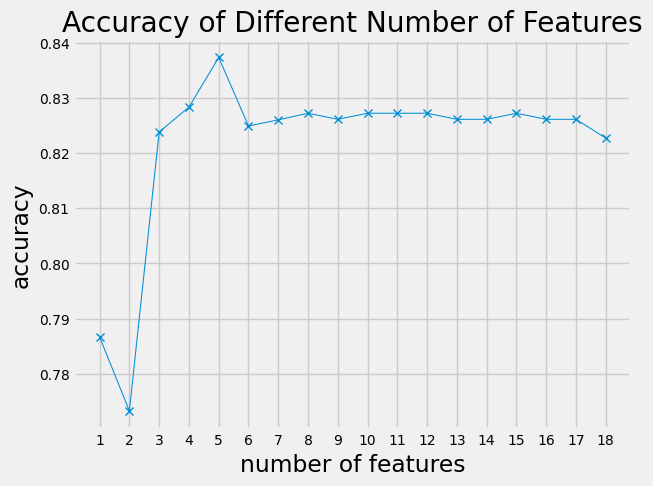

In [ ]:
# Accuracies of models with different number of features
acc_models = {}
for i in range(len(features_ranked)-1, 0, -1):
    gscv.fit(train.drop(columns=['Survived']).loc[:,features_ranked[:i]], train['Survived'])
    acc_models[i] = round(gscv.best_score_,4)

plt.plot(acc_models.keys(), acc_models.values(), marker='x', lw=.75)
plt.tick_params('both', labelsize=10)
plt.xticks(range(min(acc_models.keys()),max(acc_models.keys())+1))
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("Accuracy of Different Number of Features")
plt.show()

&emsp;The best model has the best 5 features. Re-train models with the features.

0.8373033707865168
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 11}


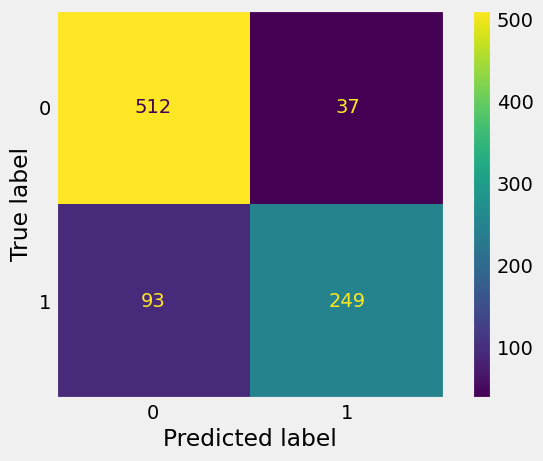

0.8540965207631874


In [ ]:
gscv.fit(train.drop(columns=['Survived']).loc[:,features_ranked[:5]], train['Survived'])
print(gscv.best_score_)
print(gscv.best_params_)
# Evaluate performance on training
conf = confusion_matrix(train['Survived'], gscv.best_estimator_.predict(train.drop(columns=['Survived']).loc[:,features_ranked[:5]]))
ConfusionMatrixDisplay(conf).plot()
plt.grid(False)
plt.show()
print(gscv.best_estimator_.score(train.drop(columns=['Survived']).loc[:,features_ranked[:5]], train['Survived']))

In [ ]:
# Perform prediction on test set
y_pred = gscv.best_estimator_.predict(test.loc[:,features_ranked[:5]])
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("tree.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

0.8540965207631874


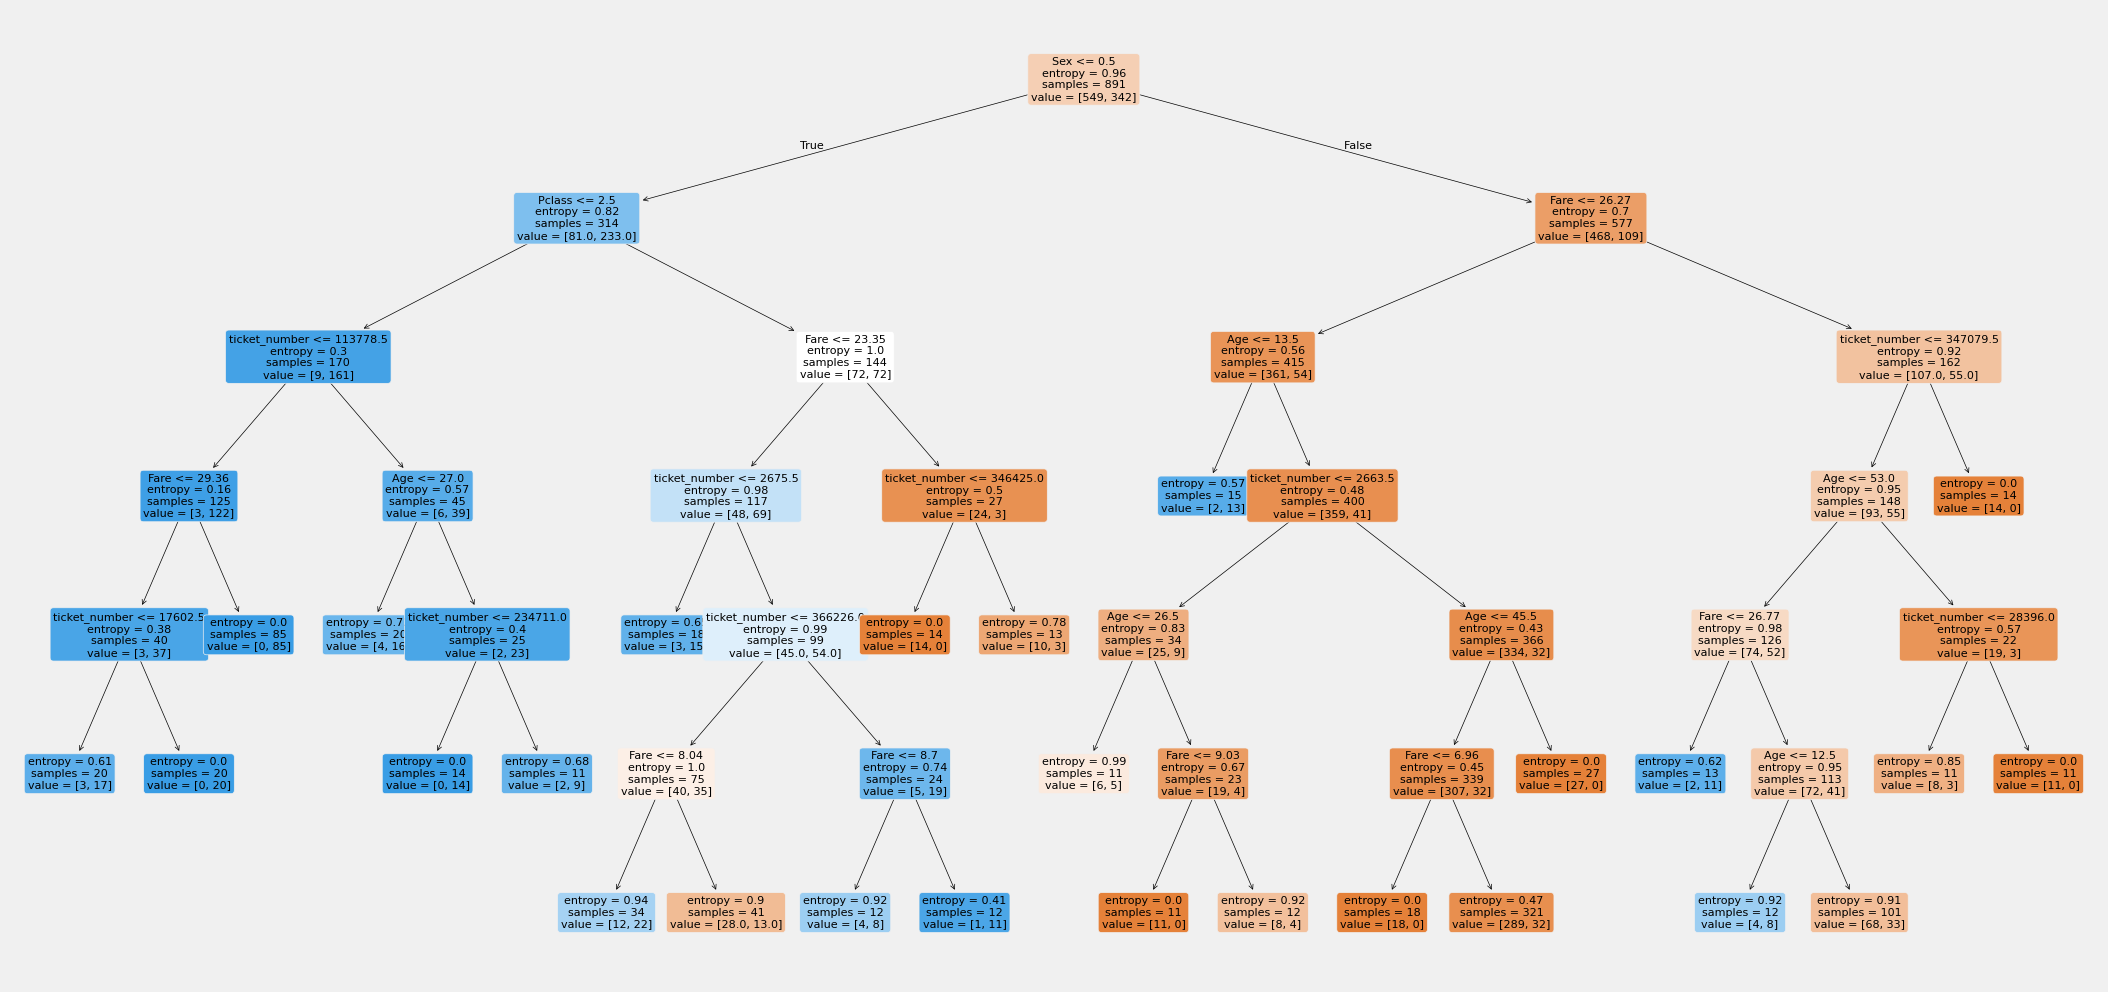

In [ ]:
best_tree = gscv.best_estimator_
best_tree.fit(train.drop(columns=['Survived']).loc[:,features_ranked[:5]], train['Survived'])
print(best_tree.score(train.drop(columns=['Survived']).loc[:,features_ranked[:5]], train['Survived']))

plt.figure(figsize=(24,12))
_ = plot_tree(best_tree,
feature_names = features_ranked[:5],
# class_names = best_tree.classes_,
filled = True,
proportion = False,
precision = 2, 
rounded = True,
fontsize = 8)
plt.show()

## Random Forest Classifier<a id='forest'></a>

In [ ]:
clf = RandomForestClassifier(n_jobs=-1, random_state=4, warm_start=True)#, bootstrap=True, oob_score=True)
params = {
    "n_estimators": [100, 150, 200],
    "criterion": ['gini', 'entropy'],
    "max_depth": [d for d in range(3,21,2)],
    "min_samples_leaf": [l for l in range(1,10)],
    "max_features": ["sqrt", 8]
}

gscv = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=5)

In [ ]:
gscv.fit(train.drop(columns=['Survived']), train['Survived'])
print(gscv.best_params_)
print(gscv.best_score_)
# print(gscv.best_estimator_.oob_score_)

KeyboardInterrupt: 

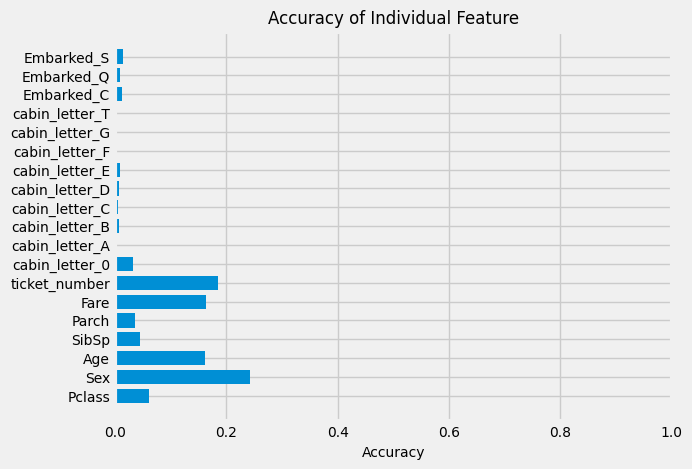

In [ ]:
plt.barh(gscv.best_estimator_.feature_names_in_, gscv.best_estimator_.feature_importances_, height=.75)
plt.tick_params('both', labelsize=10)
plt.xlabel("Accuracy", fontsize=10)
plt.xlim(0,1)
plt.title("Accuracy of Individual Feature", fontsize=12)
plt.show()

&emsp;The importance of features varied from those from decision tree. `Sex` is still at the top; however, `ticket_number` is the second. `Fare` and `Age` come next with similar importance. The top 8 features are put into the model and re-train again.

In [ ]:
features = ["cabin_letter_0", "ticket_number", "Fare", "Parch", "SibSp", "Age", "Sex", "Pclass"]
gscv.fit(train[features], train['Survived'])
gscv.best_params_
gscv.best_score_

0.8507563869185866

In [ ]:
y_pred = gscv.best_estimator_.predict(test[features])
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("forest.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

In [ ]:
clf = ExtraTreesClassifier(random_state=4, n_jobs=-1)
clf.fit(train.drop(columns=['Survived']), train['Survived'])

ExtraTreesClassifier(n_jobs=-1, random_state=4)

In [ ]:
y_pred = clf.predict(test)
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("extra_trees.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

## Logistic Regression<a id='log'></a>

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(train.drop(columns=['Survived'])), columns=train.columns[1:])
y_train = train['Survived']
X_test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 19)
(418, 19)
(891,)


In [ ]:
clf = LogisticRegression()
params = {
    'C': [.1, .2, .3, .5, .7, .9, 1],
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'newton-cholesky', 'lbfgs']
}
gscv = GridSearchCV(clf, params, cv=5, scoring='accuracy')

In [ ]:
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 0.1, 'fit_intercept': True, 'solver': 'newton-cholesky'}
0.7912560416797438


In [ ]:
y_pred = gscv.best_estimator_.predict(X_test)

submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("logreg.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")

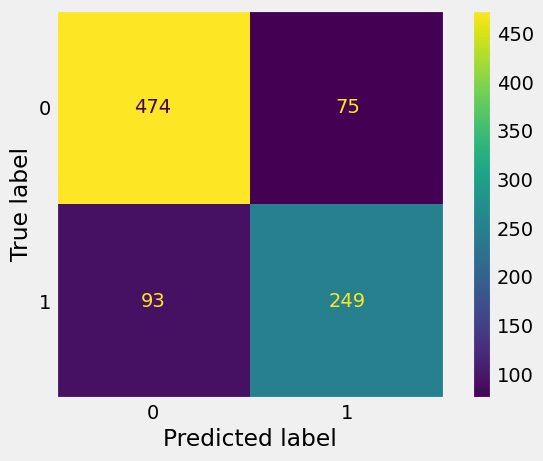

0.8114478114478114


In [ ]:
# Evaluate performance on training
conf = confusion_matrix(y_train, gscv.best_estimator_.predict(X_train))
ConfusionMatrixDisplay(conf).plot()
plt.grid(False)
plt.show()
print(gscv.best_estimator_.score(X_train, y_train))

&emsp;Similar approach is adopted where individual feature is evaluated and models with different number of features will be compared.

In [ ]:
accuracies = {}
for col in X_train.columns:
    gscv.fit(X_train[[col]], y_train)
    accuracies[col] = round(gscv.best_score_,2)

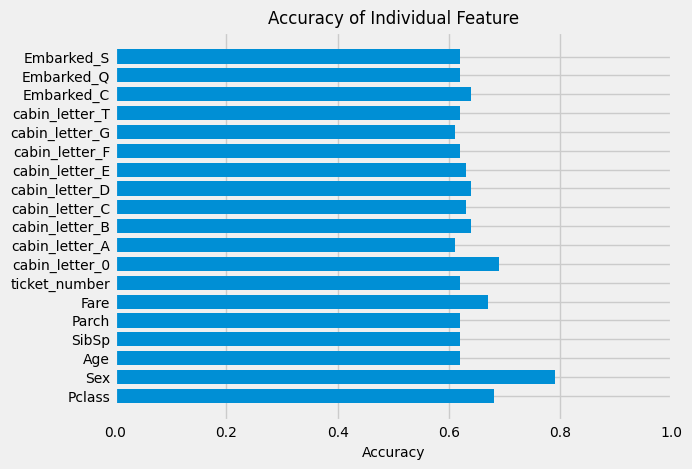

In [ ]:
plt.barh(accuracies.keys(), accuracies.values(), height=.75)
plt.tick_params('both', labelsize=10)
plt.xlabel("Accuracy", fontsize=10)
plt.xlim(0,1)
plt.title("Accuracy of Individual Feature", fontsize=12)
plt.show()

&emsp;The accuracies of the individual features are similar except for a few features such as `Sex`, `Pclass`, `cabin_letter_0`, and `Fare`. They are ranked by their individual performance. Model with $(n - 1)$ features is trained first, followed by models with one less feature at a time. Model with best performance will be used to perform prediction on test set.

In [ ]:
features_ranked = sorted(accuracies, key=accuracies.get, reverse=True) # Rank features by accuracy (index 0 has the top accuracy)

acc_models = {}
for i in range(len(features_ranked)-1, 0, -1):
    gscv.fit(X_train.loc[:,features_ranked[:i]], y_train)
    acc_models[i] = round(gscv.best_score_,4)

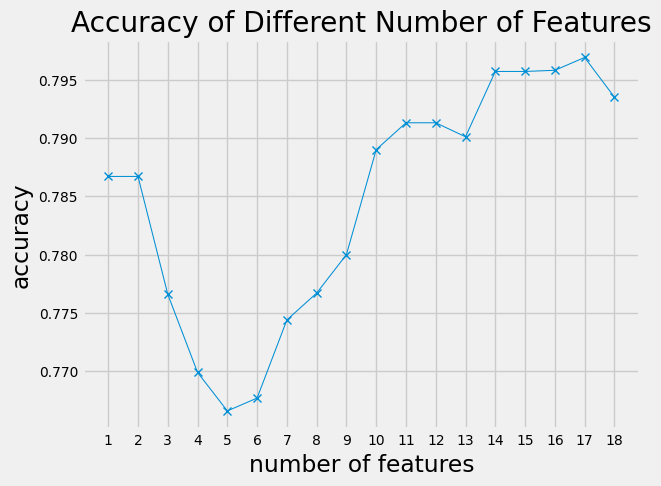

In [ ]:
plt.plot(acc_models.keys(), acc_models.values(), marker='x', lw=.75)
plt.tick_params('both', labelsize=10)
plt.xticks(range(min(acc_models.keys()),max(acc_models.keys())+1))
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("Accuracy of Different Number of Features")
plt.show()

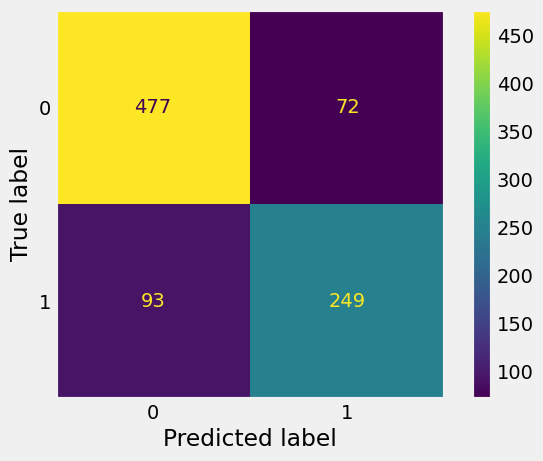

{'C': 0.1, 'fit_intercept': True, 'solver': 'lbfgs'}
0.7968740192078337


In [ ]:
# Re-fit grid search object with the 17 features
gscv.fit(X_train[features_ranked[:17]], y_train)
# Evaluate performance on training
conf = confusion_matrix(y_train, gscv.best_estimator_.predict(X_train[features_ranked[:17]]))
ConfusionMatrixDisplay(conf).plot()
plt.grid(False)
plt.show()

print(gscv.best_params_)
print(gscv.best_score_)

In [ ]:
# Perform prediction on test set
y_pred = gscv.best_estimator_.predict(X_test[features_ranked[:17]])
submission = pd.DataFrame({'PassengerId':id, 'Survived':y_pred})
with open("logreg.csv", "w") as file:
    file.write("PassengerId,Survived\n")
    for i, row in enumerate(submission.iterrows()):
        if i == submission.shape[0]-1:
            file.write(str(row[1][0]) + "," + str(row[1][1]))
        else:
            file.write(str(row[1][0]) + "," + str(row[1][1]) + "\n")